In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
file_train = 'fashion-mnist_train.csv'
file_test = 'fashion-mnist_test.csv'

In [7]:
train = np.asarray(pd.read_csv(file_train), dtype='uint8')
test = np.asarray(pd.read_csv(file_test), dtype='uint8')

In [8]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [13]:
labels_train = train[:,0]
pixels_train = train[:,1:]

labels_test = test[:,0]
pixels_test = test[:,1:]

In [14]:
# reshape the image
tmp_img = np.reshape(pixels_train[1,:], (28,28))

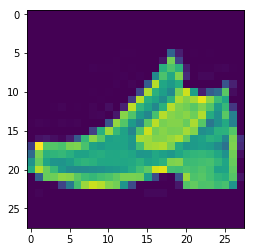

In [15]:
plt.imshow(tmp_img)

In [27]:
Image.fromarray(tmp_img).convert('L')

In [23]:
def csv2img(pixels):
    n_samples = pixels.shape[0]
    out = np.zeros((n_samples, 28, 28))
    for i in range(n_samples):
        px = pixels[i, :]
        out[i, ...] = np.reshape(px, (28, 28))
    return out

In [22]:
train_images = csv2img(pixels_train)
print(train_images.shape)

test_images = csv2img(pixels_test)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [28]:
def save_to_folder(images, labels, folder):
    # store to a folder according to the label
    assert labels.shape[0] == images.shape[0]
    n_samples = labels.shape[0]
    for i in range(n_samples):
        lbl = str(labels[i])
        path = os.path.abspath(os.path.join(folder, lbl))
        if not os.path.exists(path):
            os.makedirs(path)
        
        f_name = os.path.join(path, "%s.%s" % (str(i), 'png'))
        # store the image
        Image.fromarray(images[i, ...]).convert('L').save(f_name)

In [ ]:
def save_as_np(images, labels, f_name):
    # save as numpy zip
    path = os.path.abspath(f_name)
    if not os.path.exists(path):
        os.makedirs(path)
    
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [29]:
# store the images 
save_to_folder(train_images, labels_train, './train')

In [30]:
# store the images 
save_to_folder(test_images, labels_test, './test')

In [43]:
x_train = train_images
y_train = labels_train

x_test = test_images
y_test = labels_test
np.savez_compressed('./fashionmnist.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [46]:
# try to load
f = np.load('./fashionmnist.npz')
print(f.keys())
print(f['x_train'].shape)
f.close()


['x_test', 'y_test', 'y_train', 'x_train']
(60000, 28, 28)
